# Telecom Churn Case Study - By Rajeev Punjabi
## Problem statement:-
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

## Steps:-
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

# Reading and understanding the data

In [3]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
# Looking at data statistics
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

# Handling missing values

#### Handling missing values in columns

In [7]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [8]:
# Checking missing values % in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [9]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [10]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [11]:
df.shape

(99999, 186)

#### Deleting the date columns as these columns not required in our analysis

In [12]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [13]:
# Dropping the date columns
df = df.drop(date_cols, axis=1)

In [14]:
df.shape

(99999, 178)

# Filtering high-value customers

#### Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [15]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

#### Finding the 70th percentile of the avg_rech_amt_6_7

In [16]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

#### Filter the customers, who have recharged more than or equal to X.

In [17]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00

In [18]:
df.shape

(30011, 179)

#### We can see that we have around ~30K rows after filtering

### Handling missing values in rows

In [19]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 179)

In [20]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 179)

In [21]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
spl_og_mou_9,5.32
loc_og_t2t_mou_9,5.32
std_og_t2f_mou_9,5.32
loc_ic_mou_9,5.32
loc_ic_t2m_mou_9,5.32
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00


#### Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

#### Lets check the records for the MOU for September (9), in which these columns have missing values together.

In [22]:
# Listing the columns of MOU Sep(9)
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['spl_og_mou_9', 'loc_og_t2t_mou_9', 'std_og_t2f_mou_9', 'loc_ic_mou_9', 'loc_ic_t2m_mou_9', 'roam_og_mou_9', 'std_ic_t2f_mou_9', 'std_og_t2m_mou_9', 'std_ic_t2m_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2f_mou_9', 'loc_og_t2m_mou_9', 'std_og_t2t_mou_9', 'loc_og_t2f_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'std_ic_t2o_mou_9', 'roam_ic_mou_9', 'offnet_mou_9', 'std_og_mou_9', 'ic_others_9', 'isd_og_mou_9', 'isd_ic_mou_9', 'og_others_9', 'spl_ic_mou_9', 'loc_og_t2c_mou_9', 'onnet_mou_9', 'std_ic_mou_9', 'std_og_t2c_mou_9']


In [23]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,109,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.

In [24]:
df_null_mou_9.shape

(1590, 179)

In [25]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [26]:
# Again Checking  missing values % in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
ic_others_8,0.55
spl_og_mou_8,0.55
loc_ic_t2f_mou_8,0.55
std_og_t2t_mou_8,0.55
loc_ic_t2m_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


#### Looks like MOU for all the types of calls for the month of August (8) have missing values together for any particular record.

#### Lets check the records for the MOU for August (8), in which these columns have missing values together.

In [27]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['ic_others_8', 'spl_og_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_8', 'og_others_8', 'loc_og_t2m_mou_8', 'isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_t2f_mou_8', 'std_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2c_mou_8', 'std_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'std_ic_t2t_mou_8', 'offnet_mou_8', 'std_ic_t2m_mou_8', 'isd_ic_mou_8', 'std_ic_t2f_mou_8', 'onnet_mou_8', 'spl_ic_mou_8', 'std_ic_t2o_mou_8']


In [28]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,109,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,109,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.

In [29]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [30]:
# Again checking missing values % in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_6,0.44
loc_og_t2t_mou_6,0.44
loc_og_t2f_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_og_mou_6,0.44
...,...
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00
std_og_t2c_mou_9,0.00


#### Looks like MOU for all the types of calls for the month of June (6) have missing values together for any particular record.

#### Lets check the records for the MOU for June (6), in which these columns have missing values together.

In [31]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['loc_ic_t2f_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'ic_others_6', 'loc_ic_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'spl_ic_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2c_mou_6', 'roam_og_mou_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6']


In [32]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,109,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,109,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,

In [33]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [34]:
# Again checking missing values % in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_og_t2m_mou_7,0.12
loc_og_t2t_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
isd_og_mou_9,0.00
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00


#### Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

#### Lets check the records for the MOU for July (7), in which these columns have missing values together.

In [35]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['std_og_t2m_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'isd_ic_mou_7', 'spl_og_mou_7', 'spl_ic_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_og_mou_7', 'roam_ic_mou_7', 'offnet_mou_7', 'onnet_mou_7']


In [36]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,109,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,109,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.

In [37]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [38]:
# Again checking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_6,0.0
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0


#### We can see there are no more missing values in any columns.

In [39]:
df.shape

(27991, 179)

In [40]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.07

#### We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

## Tag churners

#### Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [41]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [42]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,1

#### Deleting all the attributes corresponding to the churn phase

In [43]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [44]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

### Checking churn percentage

In [45]:
round(100*(df['churn'].mean()),2)

3.39

#### There is very little percentage of churn rate. We will take care of the class imbalance later.

# Outliers treatment

#### In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [46]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 138 entries, mobile_number to churn
dtypes: float64(110), int64(26), object(2)
memory usage: 29.7+ MB


In [48]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=136)


In [49]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 138)

# Derive new features

In [50]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### Deriving new column decrease_mou_action

#### This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [51]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [52]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [53]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [54]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [55]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151

### Deriving new column decrease_rech_num_action

#### This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [56]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [57]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [58]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [59]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229

### Deriving new column decrease_rech_amt_action

#### This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [60]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [61]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [62]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [63]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0

### Deriving new column decrease_arpu_action

#### This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [64]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [65]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [66]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [67]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,1

### Deriving new column decrease_vbc_action

#### This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [68]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [69]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [70]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [71]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28

# Performing EDA

### Let us first start with Univariate analysis

#### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [72]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

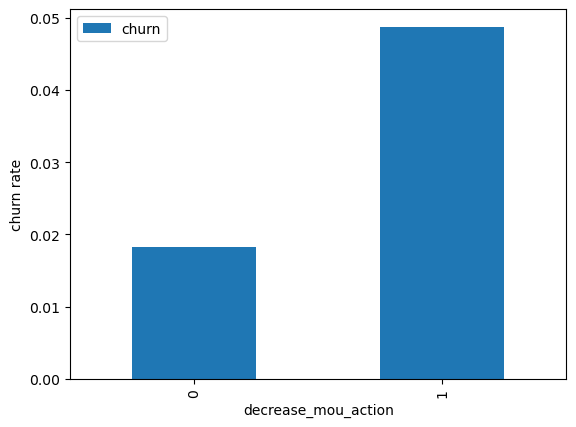

In [73]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### Observations and Analysis

#### It can thus be seen that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

#### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

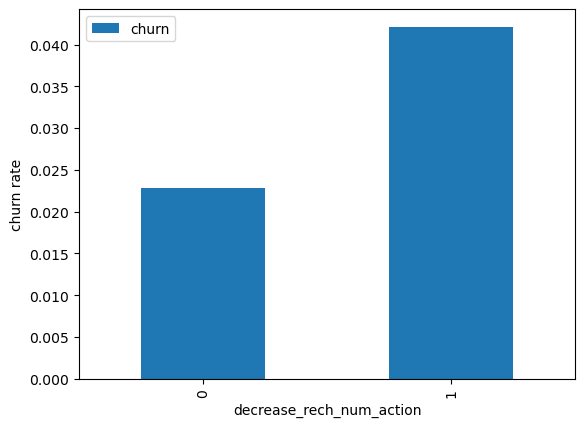

In [74]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### Observations and Analysis

#### As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

#### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

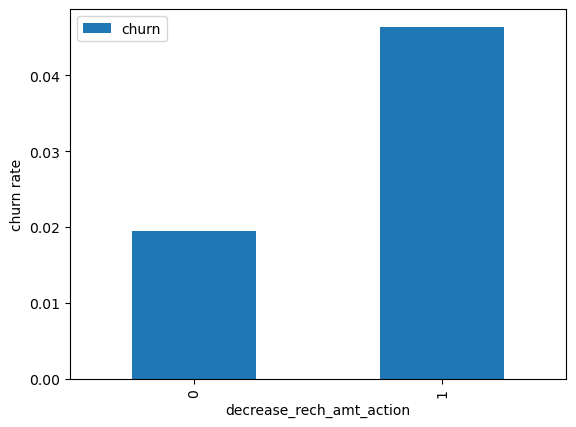

In [75]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### Observations and Analysis

#### Same observation can be drawn from the above behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

#### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

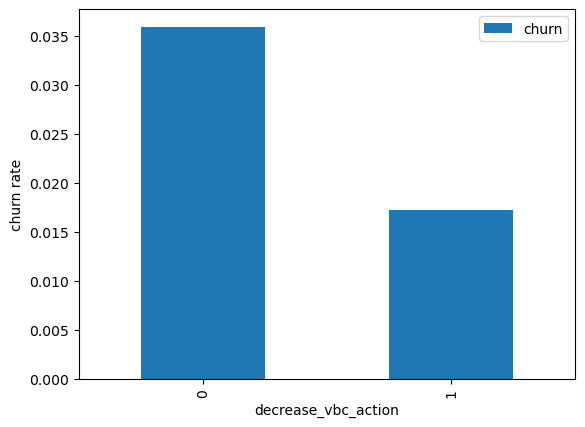

In [76]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### Observations and Analysis

#### Now the expected result can be seen above. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

#### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [77]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

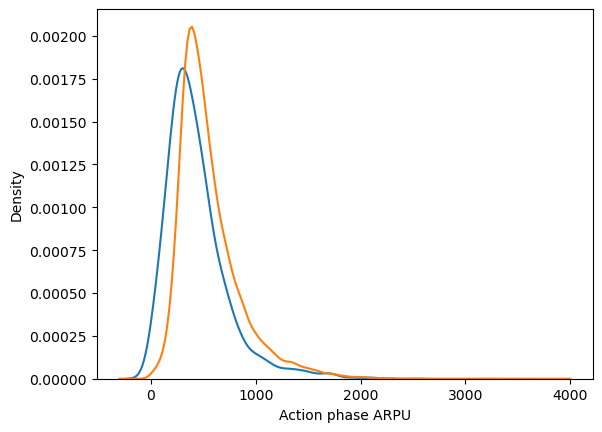

In [78]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

#### Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

#### ARPU for the not churned customers is mostly densed on the 0 to 1000.

#### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

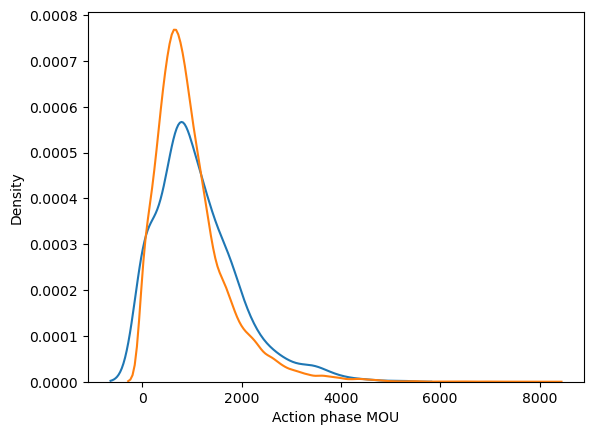

In [79]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

#### Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

# Now let us continue with Bivariate analysis

#### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

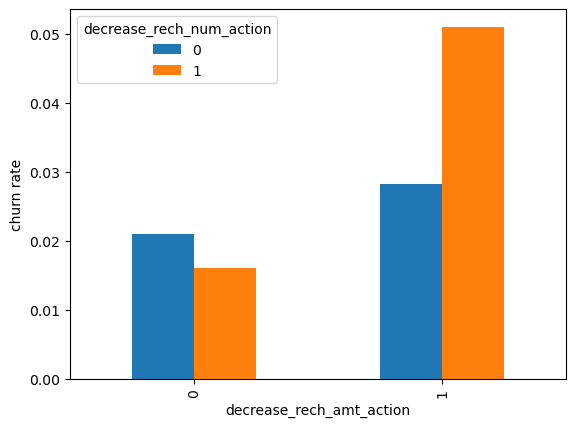

In [80]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### Observations and Analysis

#### As per the above plot, it can be seen that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

#### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

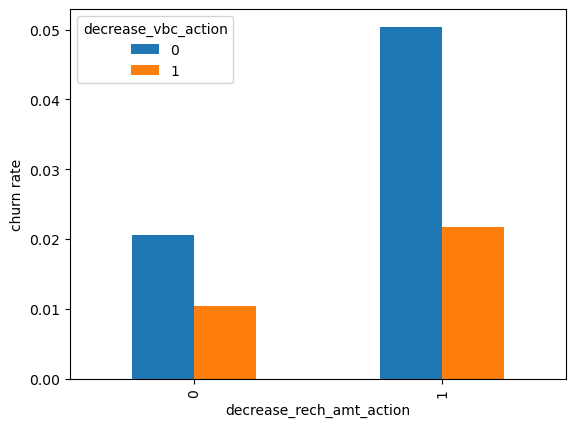

In [81]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### Observations and Analysis

#### As per the above graph plot, we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

#### Dropping few derived columns, which are not required in further analysis

In [82]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

# Train-Test Split

In [83]:
# Import library
from sklearn.model_selection import train_test_split

In [84]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [85]:
# Putting target variable to y
y = data['churn']

In [86]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Feature Scaling

In [87]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [88]:
# Instantiate the Scaler
scaler = StandardScaler()

In [89]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [90]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [91]:
X_train.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
76637,0.0,0.0,0.0,0.0,0.177042,-0.565237,-0.615403,0.342004,-0.607254,-0.528515,-0.153098,-0.662893,0.076469,-0.226857,0.205784,-0.080821,-0.262731,-0.231835,-0.199342,-0.322715,-0.372360,-0.354566,0.151967,-0.420117,-0.642896,-0.323654,-0.340270,-0.332085,-0.221854,-0.211338,-0.248213,-0.126098,-0.533371,-0.658333,0.613923,-0.439814,-0.371548,-0.185381,-0.424027,0.497949,-0.163033,-0.158166,-0.158073,0.0,0.0,0.0,0.289420,-0.592755,0.091351,-0.095491,-0.105549,-0.083560,-0.333192,-0.333239,-0.110669,-0.307087,-0.021261,-0.019099,0.178334,-0.878440,-0.282817,-0.266913,-0.331719,-0.361200,-0.505072,-0.458802,-0.658630,-0.348956,-0.341145,-0.267723,-0.546581,-0.550273,-0.689043,-0.161028,-0.154808,-0.015655,-0.155433,0.245509,-0.193470,-0.151088,-0.154416,-0.145034,0.0,0.0,0.0,-0.223572,0.054576,-0.171473,-0.595060,-0.488322,-0.695983,-0.32758,-0.091097,-0.253722,-0.159145,-0.165185,-0.160355,-0.095128,-0.122138,-0.106000,0.217883,-0.419014,0.044523,0.088303,-0.769872,-0.570923,-0.079749,-0.107353,-0.222292,0.423106,-0.813590,-0.745726,-0.158283,0.454756,1.244475,0.328358,0.848931,-0.329023,2.284614,2.178305,-0.328849,3.204652,1.773057,1.745129,-0.298681,-0.300081,-0.301197,-0.16188,-0.160519,-0.146661,-0.509556,-0.324997,-0.338332,-0.032583,-0.138485,1,1,1,1,1
44417,0.0,0.0,0.0,0.0,-1.385359,4.245131,2.814453,-0.542001,-0.146232,-0.118059,-0.772620,2.703900,2.265268,-0.226857,-0.174352,-0.177592,-0.262731,-0.231835,-0.222177,-0.273693,0.081994,-0.016667,-0.649268,0.616324,-0.090497,-0.338403,-0.340270,-0.332085,-0.221854,-0.211338,-0.248213,-0.614628,0.419754,-0.087647,-0.418751,-0.197208,-0.103563,-0.383541,2.679038,2.668757,-0.163033,-0.158166,-0.158073,0.0,0.0,0.0,-0.550271,1.713768,1.751601,-0.095491,-0.105549,-0.083560,-0.333192,-0.333239,-0.322875,-0.307087,-0.021261,-0.019099,-0.892633,1.835821,1.536431,-0.422316,0.011236,-0.062530,-0.585292,0.344107,-0.105327,-0.348956,-0.341145,-0.347484,-0.684844,0.

#### Scaling the test set

#### We don't fit scaler on the test set. We only transform the test set.

In [92]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.0,0.280204,-0.318483,0.630203,-0.619183,-0.637742,-0.538175,0.608858,0.342453,1.895103,0.019810,-0.174352,-0.177592,0.520481,-0.231835,-0.222177,-0.334519,-0.349792,-0.245889,-0.209155,-0.262736,-0.295046,-0.195189,-0.340270,-0.332085,0.060650,-0.211338,-0.248213,-0.360120,-0.420070,-0.365739,-0.469038,-0.488583,-0.445767,0.617438,0.545049,2.325447,-0.163033,-0.158166,-0.158073,0.0,0.0,0.0,0.096043,0.043595,1.290694,-0.095491,-0.105549,-0.08356,0.961014,0.702674,0.491423,0.277486,-0.021261,-0.019099,-0.102091,-0.180668,0.990936,-0.381893,-0.203679,0.031197,-0.132443,-0.332588,0.101421,-0.348956,-0.341145,-0.300474,-0.345776,-0.393827,0.044328,-0.201883,-0.191149,-0.211830,0.074310,-0.199548,-0.232537,-0.151088,-0.154416,-0.145034,0.0,0.0,0.0,-0.082033,-0.271250,-0.303617,-0.365356,-0.421554,-0.114210,-0.32758,-0.091097,-0.253722,-0.159145,0.158481,-0.160355,-0.095128,-0.122138,-0.106000,-0.105347,0.216583,0.897048,0.131441,-0.290803,0.441510,-0.079749,-0.275094,-0.222292,0.071230,0.184772,-0.514261,2.663370,1.615419,-0.174947,-0.324930,-0.178911,0.236482,2.284614,-0.348515,-0.328849,0.284769,1.773057,1.745129,-0.298681,-0.300081,-0.301197,1.03250,0.914001,1.820414,0.003445,-0.133609,0.020306,-0.317058,0.301785,0,0,1,1,0
64892,0.0,0.0,0.0,0.0,0.084955,-0.814767,-0.500458,-0.629329,-0.646247,-0.560938,-0.314708,-0.600361,-0.443135,0.159624,-0.174352,-0.177592,0.011124,-0.231835,-0.222177,-0.334648,-0.365370,-0.296837,-0.468284,-0.430786,-0.559971,-0.327460,-0.340270,-0.332085,-0.221854,-0.211338,-0.248213,-0.535671,-0.535317,-0.568145,-0.480467,-0.488583,-0.441893,-0.056616,-0.349636,-0.117788,-0.163033,-0.158166,-0.146841,0.0,0.0,0.0,-0.370111,-0.574262,-0.375602,-0.095491,-0.105549,-0.08356,-0.314344,-0.333239,-0.322875,-0.307087,-0.021261,-0.019099,-0.677933,-0.862246,-0.666258,-0.194737,-0.392042,-0.319817,0.096598,-0.086155,-0.117805,-0.337995,-0.331166,-0.330775,-0.084685,-0.324380,-0

# Model with PCA

In [93]:
#Import PCA
from sklearn.decomposition import PCA

In [94]:
# Instantiate PCA
pca = PCA(random_state=42)

In [95]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [96]:
# Principal components
pca.components_

array([[-3.20451335e-19, -1.66533454e-16,  2.22044605e-16, ...,
        -1.07378386e-02, -9.68489643e-03,  1.00904691e-02],
       [-1.61398959e-19,  0.00000000e+00,  1.11022302e-16, ...,
        -1.37531389e-02, -1.22831436e-02, -1.69976851e-02],
       [ 7.20820338e-20,  1.38777878e-17,  3.46944695e-17, ...,
        -1.95355521e-02, -1.86680178e-02,  3.52072762e-02],
       ...,
       [ 0.00000000e+00, -1.35302318e-01, -1.72771264e-02, ...,
         1.14925430e-16, -1.02348685e-16,  3.46944695e-17],
       [-0.00000000e+00, -2.66600537e-01,  1.44240778e-01, ...,
         8.32667268e-17, -0.00000000e+00, -1.38777878e-16],
       [ 9.99999049e-01, -5.70198706e-04, -1.68806327e-04, ...,
         1.35525272e-20,  1.35525272e-19, -1.53279082e-17]])

In [97]:
# Cumulative variance of the PCAs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.09750084 0.18564686 0.23923348 0.28630099 0.32570571 0.36353238
 0.39166429 0.41937179 0.44528877 0.4703041  0.49392655 0.51681596
 0.53835202 0.55940049 0.57889452 0.5972748  0.61358947 0.62828251
 0.64259364 0.65667898 0.67021769 0.68257107 0.69465858 0.70568654
 0.71628469 0.72643636 0.73636715 0.74594788 0.75498686 0.76333696
 0.77126788 0.77896624 0.78662407 0.79397159 0.80104202 0.80767777
 0.81419019 0.82060555 0.8269299  0.83306637 0.83910778 0.84509456
 0.85088069 0.85641001 0.86179473 0.86698133 0.87199672 0.87684044
 0.88127402 0.88555816 0.88970798 0.89371142 0.89754914 0.90134264
 0.90503301 0.90871386 0.91224548 0.91564191 0.91891718 0.9220857
 0.92513198 0.92806762 0.93094579 0.93377222 0.93656127 0.93930275
 0.94202347 0.94470636 0.94736061 0.94985745 0.95232602 0.95473234
 0.95707556 0.95937776 0.96148147 0.96352336 0.96550225 0.96743696
 0.96935588 0.97120461 0.97304391 0.97484917 0.97660196 0.97831243
 0.97997465 0.98162132 0.98321264 0.98478688 0.98626855 0.98764

Text(0, 0.5, 'Cumulative Variance')

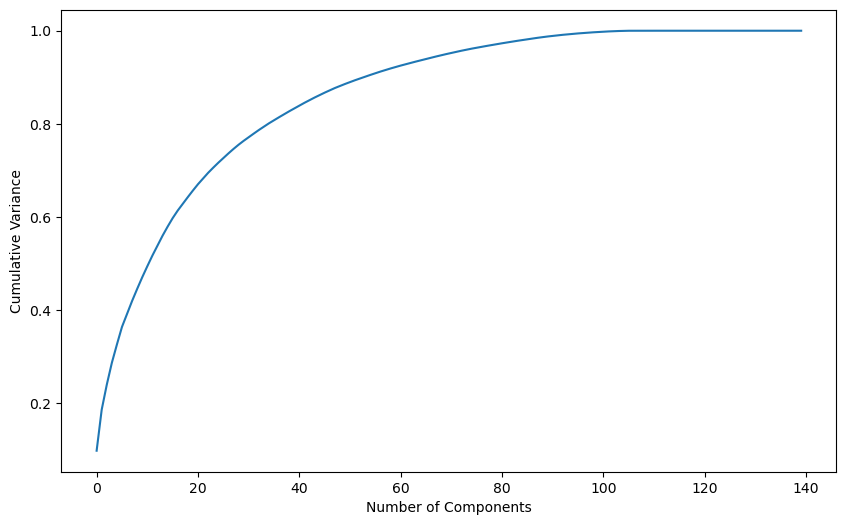

In [98]:
# Plotting it on X and Y axis
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

#### We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

#### Performing PCA with 60 components

In [99]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [100]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [101]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

# Applying transformation on the test set

#### Fitting is already done on the train set. So, done the transformation with the already fitted data on the train set.

In [102]:
X_test_pca = pca_final.transform(X_test)

### Focussing on higher Sensitivity/Recall Score than the Accuracy

#### Churn cases are important to focus on rathan than the non-churn cases. The main goal is to retain the customers, who have the possiblity to churn. There should not be a problem, if we consider few non churning customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

### Logistic regression with PCA

In [103]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [104]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Tuning hyperparameter C

#### C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [105]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [106]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [107]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099490,0.012999,0.010820,0.006309,0.01,{'C': 0.01},0.035971,0.048780,0.055172,0.020690,0.027397,0.037602,0.012857,6,0.043333,0.043478,0.045455,0.042088,0.042159,0.043302,0.001220
1,0.202564,0.022233,0.005062,0.006478,0.1,{'C': 0.1},0.064748,0.073171,0.062069,0.041379,0.041096,0.056493,0.012984,5,0.068333,0.071304,0.079125,0.060606,0.060708,0.068015,0.006966
2,0.273013,0.031671,0.002224,0.004448,1,{'C': 1},0.064748,0.079268,0.068966,0.068966,0.047945,0.065979,0.010210,1,0.076667,0.074783,0.082492,0.069024,0.070826,0.074758,0.004729
3,0.226252,0.007705,0.003126,0.006252,10,{'C': 10},0.064748,0.079268,0.068966,0.068966,0.047945,0.065979,0.010210,1,0.080000,0.074783,0.084175,0.067340,0.072513,0.075762,0.005851
4,0.231969,0.005994,0.006251,0.007656,100,{'C': 100},0.064748,0.079268,0.068966,0.068966,0.047945,0.065979,0.010210,1,0.081667,0.074783,0.082492,0.069024,0.072513,0.076095,0.005225
5,0.231561,0.006792,0.006250,0.007655,1000,{'C': 1000},0.064748,0.079268,0.068966,0.068966,0.047945,0.065979,0.010210,1,0.083333,0.074783,0.082492,0.069024,0.072513,0.076429,0.005609


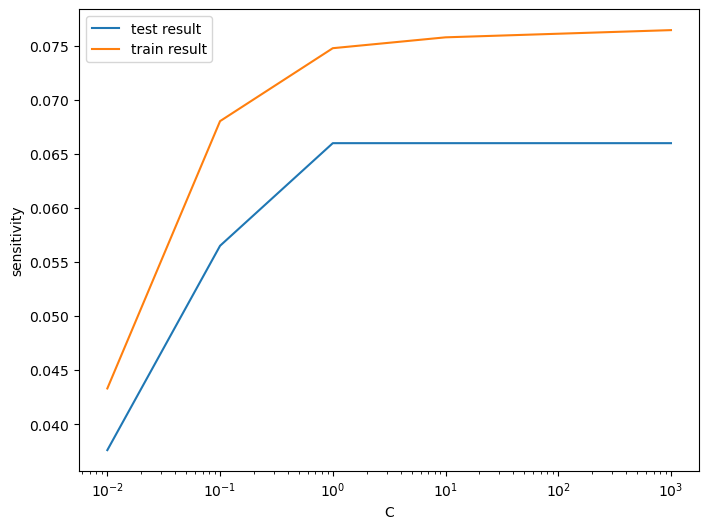

In [108]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [109]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.0659785468167973 at C = 1


### Logistic regression with optimal C

In [110]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [111]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

### Prediction on the train set

In [112]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [113]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)  

[[21375    50]
 [  685    54]]


In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9668381158635625
Sensitivity:- 0.07307171853856563
Specificity:- 0.9976662777129521


### Prediction on the test set

In [116]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [117]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5336   12]
 [ 176   17]]


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9660711062985021
Sensitivity:- 0.08808290155440414
Specificity:- 0.9977561705310396


***Model summary***

- Train set
    - Accuracy = 0.96
    - Sensitivity = 0.07
    - Specificity = 0.99
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.08
    - Specificity = 0.99
    
Overall, the model is performing slightly well in the test set, what it had learnt from the train set.

### Decision tree with PCA

In [120]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [121]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [122]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.204356,0.284629,0.006764,0.006060,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.060811,0.000000,0.128378,0.040541,0.054422,0.056830,0.041559,3
1,2.506761,0.279904,0.007282,0.008101,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.060811,0.000000,0.128378,0.040541,0.054422,0.056830,0.041559,3
2,2.161493,0.317591,0.015539,0.006101,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.067568,0.000000,0.000000,0.000000,0.068027,0.027119,0.033214,5
3,2.178512,0.268718,0.004297,0.005450,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.067568,0.000000,0.000000,0.000000,0.068027,0.027119,0.033214,5
4,3.757562,0.227155,0.011926,0.006090,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.060811,0.074324,0.128378,0.054054,0.054422,0.074398,0.027969,1
5,3.617684,0.158870,0.008756,0.007858,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.060811,0.074324,0.128378,0.054054,0.054422,0.074398,0.027969,1
6,3.557342,0.203809,0.007962,0.007328,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.067568,0.000000,0.000000,0.000000,0.068027,0.027119,0.033214,5
7,3.464600,0.297684,0.005189,0.002117,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.067568,0.000000,0.000000,0.000000,0.068027,0.027119,0.033214,5


In [123]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.0743978672550101
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


### Model with optimal hyperparameters

In [124]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

### Prediction on the train set

In [125]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [126]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21358    67]
 [  640    99]]


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9681014257354268
Sensitivity:- 0.13396481732070364
Specificity:- 0.996872812135356


### Prediction on the test set

In [129]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [130]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5326   22]
 [ 179   14]]


In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9637249593936112
Sensitivity:- 0.07253886010362694
Specificity:- 0.9958863126402393


***Model summary***

- Train set
    - Accuracy = 0.96
    - Sensitivity = 0.13
    - Specificity = 0.99
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.07
    - Specificity = 0.99
    
    
We can see from the model performance that the Sesitivity has been increased while evaluating the model on the train set. However, the accuracy and specificity is quite good and are equal in the test set as the train set.

### Random forest with PCA

In [133]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter tuning

In [134]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [135]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9666576430247248 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


### Model with optimal hyperparameters

In [136]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [137]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

### Prediction on the train set

In [138]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [139]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21425     0]
 [  739     0]]


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9666576430247248
Sensitivity:- 0.0
Specificity:- 1.0


### Prediction on the test set

In [142]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [143]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5348    0]
 [ 193    0]]


In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


***Model summary***

- Train set
    - Accuracy = 0.96
    - Sensitivity = 0.00
    - Specificity = 1.00
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.00
    - Specificity = 1.00

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Final conclusion with PCA

#### After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. We have good accuracy of approx +96%

### Without PCA

#### Logistic regression with No PCA

In [146]:
##### Importing stats model
import statsmodels.api as sm

In [147]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [148]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [149]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22030
Model Family:                Binomial   Df Model:                          133
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 13 Feb 2024   Deviance:                       4050.4
Time:                        20:48:43   Pearson chi2:                 1.95e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -99.9640   8556.215     -0.012      0.991   -1.69e+04    1.67e+04
circle_id                -4.304e-08   4.15e-06     -0.010      0.992   -8.17e-06    8.09e-06
loc_og_t2o_mou           -1.047e-07   2.33e-05     -0.004      0.996   -4.58e-05    4.56e-05
std_og_t2o_mou            3.114e-07   3.92e-05      0.008      0.994   -7.66e-05    7.72e-05
loc_ic_t2o_mou            2.996e-07   3.08e-06      0.097      0.922   -5.73e-06    6.33e-06
arpu_6                      -0.1071      0.161     -0.666      0.505      -0.422       0.208
arpu_7                       0.1165      0.176      0.662      0.508      -0.228       0.461
arpu_8                       0.0377      0.240      0.157      0.875      -0.432       0.508
onnet_mou_6                  6.2218      6.324      0.984      0.325      -6.172      18.616
onnet_mou_7                  2.2806      3.793      0.601      0.548      -5.153       9.714
onnet_mou_8                 -3.9883      4.534     -0.880      0.379     -12.875       4.898
offnet_mou_6                 6.4818      6.258      1.036      0.300      -5.783      18.747
offnet_mou_7                 2.8893      3.698      0.781      0.435      -4.358      10.137
offnet_mou_8                -5.0487      4.642     -1.088      0.277     -14.147       4.050
roam_ic_mou_6                0.0723      0.041      1.743      0.081      -0.009       0.154
roam_ic_mou_7               -0.0295      0.047     -0.627      0.531      -0.122       0.063
roam_ic_mou_8                0.0432      0.039      1.099      0.272      -0.034       0.120
roam_og_mou_6               -1.4753      1.524     -0.968      0.333      -4.463       1.512
roam_og_mou_7               -0.4149      0.715     -0.580      0.562      -1.816       0.987
roam_og_mou_8                0.9413      0.941      1.000      0.317      -0.903       2.786
loc_og_t2t_mou_6         -2037.2763   1908.566     -1.067      0.286   -5777.997    1703.444
loc_og_t2t_mou_7          -268.3279   2038.951     -0.132      0.895   -4264.599    3727.943
loc_og_t2t_mou_8          5091.8502   2224.656      2.289      0.022     731.604    9452.097
loc_og_t2m_mou_6         -2068.6792   1937.447     -1.068      0.286   -5866.006    1728.648
loc_og_t2m_mou_7          -247.6721   1877.955     -0.132      0.895   -3928.397    3433.052
loc_og_t2m_mou_8          5085.1464   2221.629      2.289      0.022     730.833    9439.460
loc_og_t2f_mou_6          -183.8121    172.206     -1.067      0.286    -521.330     153.705
loc_og_t2f_mou_7           -23.0890    174.588     -0.132      0.895    -365.276     319.098
loc_og_t2f_mou_8           453.3984    198.271      2.287      0.022      64.794     842.002
loc_og_t2c_mou_6             0.0236      0.042      0.563      0.573      -0.059       0.106
loc_og_t2c_mou

Model analysis

1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

## Feature Selection Using RFE

In [150]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [151]:
# Importing RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)

In [152]:
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [153]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8',
      

### Model-1 with RFE selected columns

In [154]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22093
Model Family:                Binomial   Df Model:                           70
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 13 Feb 2024   Deviance:                       4142.0
Time:                        20:48:54   Pearson chi2:                 2.23e+05
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -85.8095   8200.529     -0.010      0.992   -1.62e+04     1.6e+04
arpu_7                  0.1376      0.094      1.467      0.142      -0.046       0.321
onnet_mou_6             0.1258      0.050      2.501      0.012       0.027       0.224
onnet_mou_7             0.6520      1.193      0.547      0.585      -1.686       2.990
onnet_mou_8            -1.7673      3.951     -0.447      0.655      -9.510       5.976
offnet_mou_6            0.4165      0.184      2.266      0.023       0.056       0.777
offnet_mou_7            1.2229      1.088      1.124      0.261      -0.910       3.356
offnet_mou_8           -2.5211      4.047     -0.623      0.533     -10.453       5.411
roam_og_mou_7          -0.0747      0.213     -0.351      0.725      -0.492       0.342
roam_og_mou_8           0.4570      0.821      0.556      0.578      -1.152       2.066
loc_og_t2t_mou_6       -0.0525      1.671     -0.031      0.975      -3.328       3.223
loc_og_t2t_mou_7     -236.6036   1929.234     -0.123      0.902   -4017.832    3544.625
loc_og_t2t_mou_8     5338.9384   2164.284      2.467      0.014    1097.020    9580.857
loc_og_t2m_mou_6       -0.6028      1.712     -0.352      0.725      -3.958       2.753
loc_og_t2m_mou_7     -218.4370   1776.900     -0.123      0.902   -3701.096    3264.223
loc_og_t2m_mou_8     5331.7175   2161.343      2.467      0.014    1095.564    9567.871
loc_og_t2f_mou_7      -20.4418    165.201     -0.124      0.902    -344.229     303.345
loc_og_t2f_mou_8      475.3850    192.896      2.464      0.014      97.316     853.454
loc_og_mou_6            0.1293      2.611      0.050      0.961      -4.989       5.247
loc_og_mou_7          349.2205   2851.822      0.122      0.903   -5240.247    5938.688
loc_og_mou_8        -8322.7356   3373.715     -2.467      0.014   -1.49e+04   -1710.375
std_og_t2t_mou_7       -0.4638      1.049     -0.442      0.658      -2.520       1.592
std_og_t2t_mou_8       -0.1141      3.753     -0.030      0.976      -7.470       7.242
std_og_t2m_mou_6       -0.3301      0.167     -1.975      0.048      -0.658      -0.003
std_og_t2m_mou_7       -0.9321      0.995     -0.937      0.349      -2.882       1.018
std_og_t2m_mou_8        0.5425      3.853      0.141      0.888      -7.009       8.094
std_og_t2f_mou_6       -0.2161      0.128     -1.686      0.092      -0.467       0.035
std_og_t2f_mou_7        0.1390      0.102      1.360      0.174      -0.061       0.339
isd_og_mou_8           -1.2327      0.912     -1.352      0.176      -3.020       0.554
spl_og_mou_8           -0.0921      0.231     -0.399      0.690      -0.545       0.361
og_others_6            -0.1192      0.054     -2.201      0.028      -0.225      -0.013
og_others_7            -1.8120      3.982     -0.455      0.649      -9.617       5.993
og_

### Checking VIFs

In [155]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [156]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,loc_og_mou_7,4.003381e+09
38,loc_ic_mou_8,3.965190e+09
19,loc_og_mou_8,3.835906e+09
46,total_ic_mou_8,1.943739e+09
10,loc_og_t2t_mou_7,1.832130e+09
...,...,...
69,decrease_mou_action,1.250000e+00
29,og_others_6,1.240000e+00
30,og_others_7,1.090000e+00
68,sep_vbc_3g,1.060000e+00


#### Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [157]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3

### Model-2

#### Building the model after removing og_others_8 variable.

In [158]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22094
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.3
Date:                Tue, 13 Feb 2024   Deviance:                       4146.5
Time:                        20:49:14   Pearson chi2:                 2.23e+05
No. Iterations:                    13   Pseudo R-squ. (CS):            0.09991
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.3643      0.225    -28.242      0.000      -6.806      -5.923
arpu_7                  0.1334      0.094      1.424      0.154      -0.050       0.317
onnet_mou_6             0.1253      0.050      2.490      0.013       0.027       0.224
onnet_mou_7             0.7190      1.195      0.601      0.548      -1.624       3.062
onnet_mou_8            -1.5677      3.994     -0.393      0.695      -9.395       6.259
offnet_mou_6            0.4143      0.184      2.254      0.024       0.054       0.775
offnet_mou_7            1.2868      1.092      1.179      0.239      -0.853       3.427
offnet_mou_8           -2.3148      4.091     -0.566      0.572     -10.333       5.704
roam_og_mou_7          -0.0860      0.213     -0.403      0.687      -0.504       0.332
roam_og_mou_8           0.4147      0.830      0.500      0.617      -1.212       2.042
loc_og_t2t_mou_6       -0.0476      1.674     -0.028      0.977      -3.329       3.233
loc_og_t2t_mou_7     -153.0010   1929.493     -0.079      0.937   -3934.738    3628.736
loc_og_t2t_mou_8     5346.3094   2164.169      2.470      0.013    1104.617    9588.002
loc_og_t2m_mou_6       -0.5993      1.715     -0.349      0.727      -3.961       2.762
loc_og_t2m_mou_7     -141.4312   1777.139     -0.080      0.937   -3624.559    3341.696
loc_og_t2m_mou_8     5339.0760   2161.228      2.470      0.013    1103.148    9575.004
loc_og_t2f_mou_7      -13.2769    165.223     -0.080      0.936    -337.107     310.553
loc_og_t2f_mou_8      476.0398    192.886      2.468      0.014      97.991     854.088
loc_og_mou_6            0.1227      2.616      0.047      0.963      -5.004       5.249
loc_og_mou_7          225.5874   2852.206      0.079      0.937   -5364.634    5815.808
loc_og_mou_8        -8334.1795   3373.545     -2.470      0.013   -1.49e+04   -1722.154
std_og_t2t_mou_7       -0.5212      1.051     -0.496      0.620      -2.582       1.540
std_og_t2t_mou_8       -0.0607      3.795     -0.016      0.987      -7.498       7.376
std_og_t2m_mou_6       -0.3291      0.167     -1.969      0.049      -0.657      -0.001
std_og_t2m_mou_7       -0.9883      0.998     -0.990      0.322      -2.944       0.968
std_og_t2m_mou_8        0.5952      3.895      0.153      0.879      -7.039       8.229
std_og_t2f_mou_6       -0.2125      0.128     -1.655      0.098      -0.464       0.039
std_og_t2f_mou_7        0.1324      0.100      1.322      0.186      -0.064       0.329
isd_og_mou_8           -1.3568      0.914     -1.484      0.138      -3.148       0.435
spl_og_mou_8           -0.1026      0.232     -0.442      0.659      -0.558       0.353
og_others_6            -0.1190      0.054     -2.195      0.028      -0.225      -0.013
og_others_7            -2.5285      3.847     -0.657      0.511     -10.068       5.011
tot

#### Checking VIF for Model-2

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,loc_og_mou_7,4.003068e+09
37,loc_ic_mou_8,3.965016e+09
19,loc_og_mou_8,3.835890e+09
45,total_ic_mou_8,1.943643e+09
10,loc_og_t2t_mou_7,1.831987e+09
...,...,...
68,decrease_mou_action,1.250000e+00
29,og_others_6,1.230000e+00
30,og_others_7,1.070000e+00
67,sep_vbc_3g,1.060000e+00


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [160]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model-3

Model after removing offnet_mou_8 column.

In [161]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22095
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.4
Date:                Tue, 13 Feb 2024   Deviance:                       4146.9
Time:                        20:49:30   Pearson chi2:                 2.22e+05
No. Iterations:                    13   Pseudo R-squ. (CS):            0.09990
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.3637      0.225    -28.249      0.000      -6.805      -5.922
arpu_7                  0.1341      0.094      1.432      0.152      -0.049       0.318
onnet_mou_6             0.1249      0.050      2.483      0.013       0.026       0.223
onnet_mou_7             0.6329      1.182      0.535      0.592      -1.685       2.950
onnet_mou_8             0.6793      0.426      1.595      0.111      -0.155       1.514
offnet_mou_6            0.4154      0.184      2.259      0.024       0.055       0.776
offnet_mou_7            1.1955      1.076      1.111      0.267      -0.914       3.305
roam_og_mou_7          -0.0679      0.210     -0.323      0.747      -0.480       0.344
roam_og_mou_8          -0.0539      0.057     -0.938      0.348      -0.166       0.059
loc_og_t2t_mou_6       -0.0556      1.672     -0.033      0.973      -3.332       3.221
loc_og_t2t_mou_7     -141.4615   1929.354     -0.073      0.942   -3922.926    3640.003
loc_og_t2t_mou_8     5372.2570   2163.727      2.483      0.013    1131.430    9613.084
loc_og_t2m_mou_6       -0.6067      1.712     -0.354      0.723      -3.963       2.750
loc_og_t2m_mou_7     -130.7995   1777.010     -0.074      0.941   -3613.676    3352.077
loc_og_t2m_mou_8     5364.9831   2160.787      2.483      0.013    1129.919    9600.047
loc_og_t2f_mou_7      -12.2880    165.211     -0.074      0.941    -336.095     311.519
loc_og_t2f_mou_8      478.3515    192.846      2.480      0.013     100.380     856.323
loc_og_mou_6            0.1334      2.612      0.051      0.959      -4.985       5.252
loc_og_mou_7          208.5994   2852.001      0.073      0.942   -5381.220    5798.418
loc_og_mou_8        -8374.6388   3372.856     -2.483      0.013    -1.5e+04   -1763.962
std_og_t2t_mou_7       -0.4461      1.040     -0.429      0.668      -2.484       1.592
std_og_t2t_mou_8       -0.0736      3.790     -0.019      0.985      -7.502       7.355
std_og_t2m_mou_6       -0.3306      0.167     -1.977      0.048      -0.658      -0.003
std_og_t2m_mou_7       -0.9042      0.984     -0.919      0.358      -2.832       1.024
std_og_t2m_mou_8        0.5754      3.890      0.148      0.882      -7.050       8.200
std_og_t2f_mou_6       -0.2118      0.128     -1.651      0.099      -0.463       0.040
std_og_t2f_mou_7        0.1340      0.100      1.339      0.181      -0.062       0.330
isd_og_mou_8           -1.3382      0.911     -1.469      0.142      -3.123       0.447
spl_og_mou_8           -0.0751      0.226     -0.332      0.740      -0.518       0.368
og_others_6            -0.1146      0.054     -2.141      0.032      -0.219      -0.010
og_others_7            -2.5062      3.850     -0.651      0.515     -10.052       5.039
total_og_mou_8         -1.4716      6.245     -0.236      0.814     -13.711      10.768
loc

#### Checking VIF for Model-3

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,loc_og_mou_7,4.002990e+09
36,loc_ic_mou_8,3.965016e+09
18,loc_og_mou_8,3.835621e+09
44,total_ic_mou_8,1.942690e+09
9,loc_og_t2t_mou_7,1.831952e+09
...,...,...
67,decrease_mou_action,1.250000e+00
28,og_others_6,1.140000e+00
66,sep_vbc_3g,1.060000e+00
29,og_others_7,1.030000e+00


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-3 log_no_pca_3 will be the final model.

### Model performance on the train set

In [163]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

76637    3.397840e-02
44417    3.976575e-02
77582    5.048806e-04
48224    6.747425e-04
76321    7.466879e-10
dtype: float64

Creating a dataframe with the actual churn and the predicted probabilities

In [164]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,3.397840e-02,0
1,0,3.976575e-02,1
2,0,5.048806e-04,2
3,0,6.747425e-04,3
4,0,7.466879e-10,4


Finding Optimal Probablity Cutoff Point

In [165]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,3.397840e-02,0,1,0,0,0,0,0,0,0,0,0
1,0,3.976575e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,5.048806e-04,2,1,0,0,0,0,0,0,0,0,0
3,0,6.747425e-04,3,1,0,0,0,0,0,0,0,0,0
4,0,7.466879e-10,4,1,0,0,0,0,0,0,0,0,0


Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [166]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.033342     1.000000     0.000000
0.1          0.1  0.930698     0.690122     0.938996
0.2          0.2  0.957814     0.565629     0.971342
0.3          0.3  0.965439     0.437077     0.983664
0.4          0.4  0.967695     0.220568     0.993466
0.5          0.5  0.967199     0.096076     0.997246
0.6          0.6  0.966658     0.043302     0.998506
0.7          0.7  0.966703     0.021651     0.999300
0.8          0.8  0.966658     0.006766     0.999767
0.9          0.9  0.966567     0.000000     0.999907


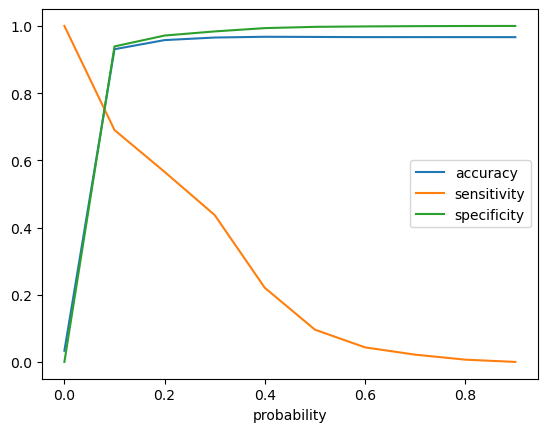

In [167]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

Accuracy - Increases with the increasing probablity.

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.1 the three parameters cut each other, we can see that there is a balance between accuracy and specificity from 0.1 onwards.

Here we are intending to achieve better sensitivity than accuracy and specificity. As per the above curve, we should take 0.1 as the optimum probability cutoff, which is our main goal.

In [168]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,3.397840e-02,0,1,0,0,0,0,0,0,0,0,0,0
1,0,3.976575e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,5.048806e-04,2,1,0,0,0,0,0,0,0,0,0,0
3,0,6.747425e-04,3,1,0,0,0,0,0,0,0,0,0,0
4,0,7.466879e-10,4,1,0,0,0,0,0,0,0,0,0,0


Metrics

In [169]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[21366    59]
 [  668    71]]


In [170]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [171]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.967199061541238
Sensitivity:- 0.09607577807848444
Specificity:- 0.9972462077012836


We have got good accuracy, sensitivity and specificity on the train set prediction.

Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [172]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

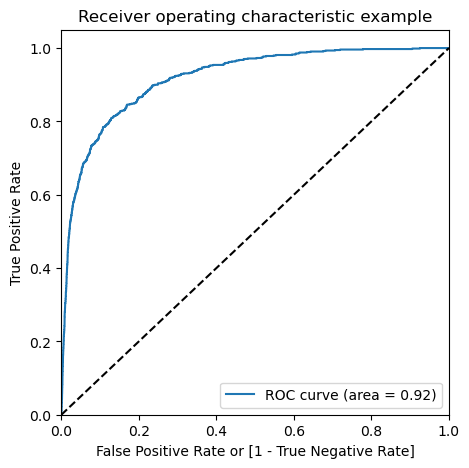

In [173]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, which is the Gini of the model.

### Testing the model on the test set

In [174]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [175]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [176]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

#### Predictions on the test set with final model

In [177]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [178]:
y_test_pred.head()

5704     0.001901
64892    0.000516
39613    0.000384
93118    0.006191
81235    0.002791
dtype: float64

In [179]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.001901
64892,0.000516
39613,0.000384
93118,0.006191
81235,0.002791


In [180]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [181]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [182]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [183]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [184]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.001901
1,0,64892,0.000516
2,0,39613,0.000384
3,0,93118,0.006191
4,0,81235,0.002791


In [185]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [186]:
y_test_pred_final.head()

,churn,CustID,churn_prob
0,0,5704,0.001901
1,0,64892,0.000516
2,0,39613,0.000384
3,0,93118,0.006191
4,0,81235,0.002791


In [187]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [188]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,5704,0.001901,0
1,0,64892,0.000516,0
2,0,39613,0.000384,0
3,0,93118,0.006191,0
4,0,81235,0.002791,0


Metrics

In [189]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[5330   18]
 [ 176   17]]


In [190]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [191]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9649882692654755
Sensitivity:- 0.08808290155440414
Specificity:- 0.9966342557965595


***Model summary***

- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.08
    - Specificity = 0.99


Final conclusion with no PCA

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it explains the important predictor variables as well as the significance of each variable. 
The model also hels us to identify the variables which should be acted upon for making the decision of the churned customers. Hence, the model is more relevant in terms of explaining to the business.

## Business recommendation

### Top predictors

Below are few top variables selected in the logistic regression model.

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

#### Recommendations

Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
Customers whose outgoing others charge in July and incoming others on August are less can also be the target group.
Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
Customers, whose monthly 3G recharge in August is more, are likely to be churned.
Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
Customers with decreasing monthly 2g usage for August are most probable to churn.
Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
Roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.

### Plots of important predictors for churn and non churn customer

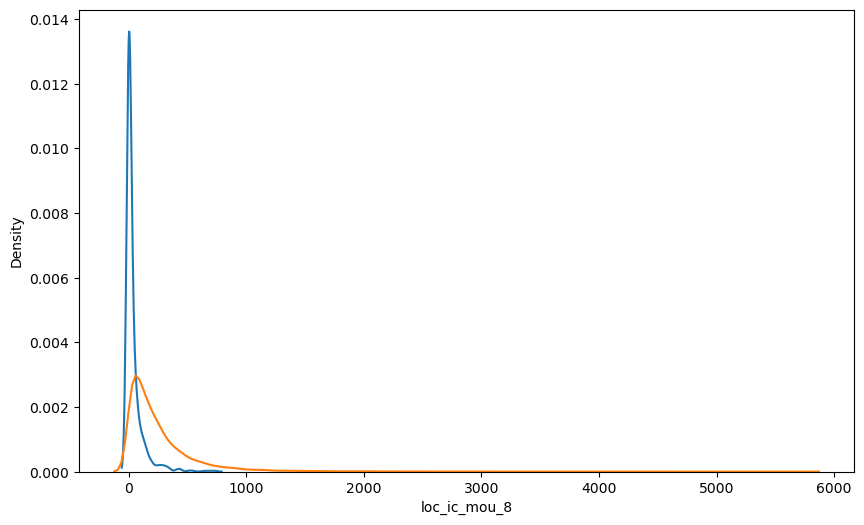

In [192]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

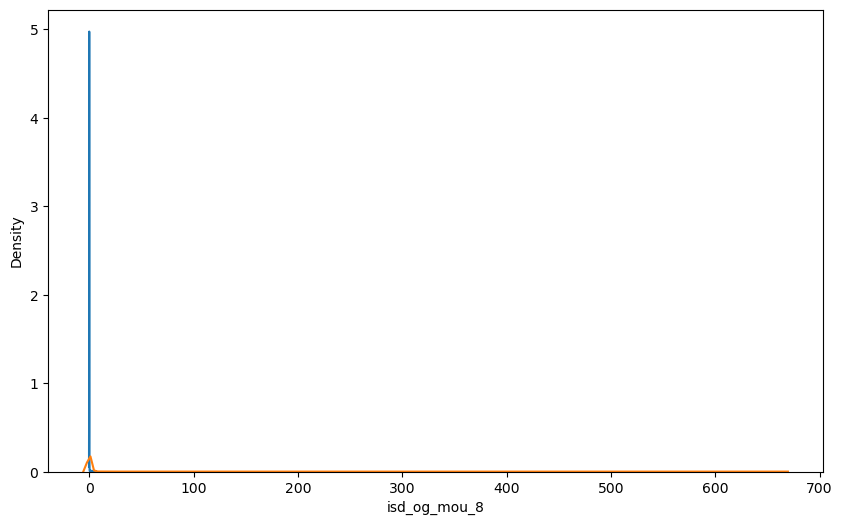

In [193]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the other hand for the non churn customers it is little more than the churn customers.

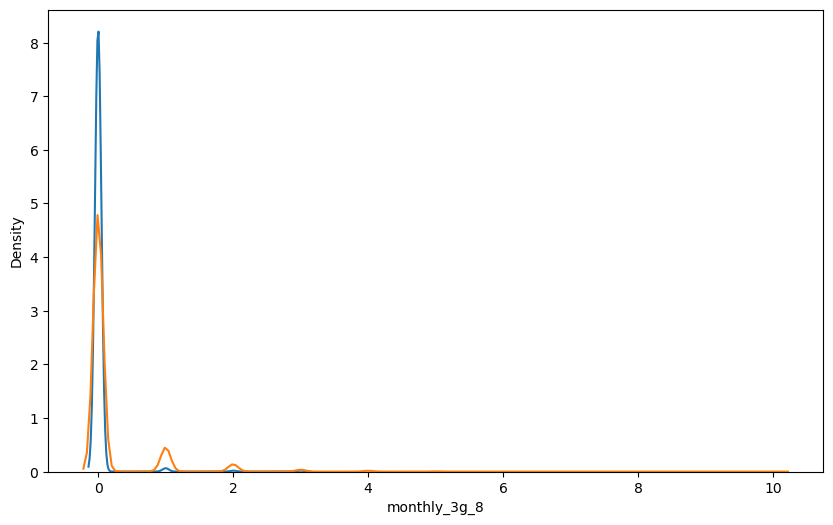

In [194]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of monthly 3g data for August for the churn customers are very much populated around 1, whereas of non churn customers is spread across various numbers.